In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [188]:
# Load data
P8_C_F_otus_data = pd.read_csv('pathway_out_C_F.csv',sep=',',index_col=0)
P8_C_F_metadata = pd.read_csv('P8_C_F.csv',sep=',',index_col=0)
P8_C_F_otus_data

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
1CMET2-PWY,5726.386963,6252.467343,6760.912269,26024.153310,28185.972820,26329.040920,6920.818897,5540.590494,24773.794220,27799.463090,...,23186.750190,23174.925140,19784.710410,24052.784230,30542.292430,33729.295030,21111.381620,22754.801300,10118.391700,14422.324630
3-HYDROXYPHENYLACETATE-DEGRADATION-PWY,0.000000,19.219651,7.841254,55.641473,50.537383,83.778301,0.000000,0.000000,46.385822,35.233076,...,13.640038,57.462229,0.000000,14.377398,81.861881,97.524871,13.569157,38.096594,679.609110,141.254402
AEROBACTINSYN-PWY,0.000000,22.766798,0.000000,61.605916,41.347068,147.079170,0.000000,17.500000,45.036675,18.652724,...,10.141986,29.695147,10.029851,19.947989,64.430036,82.273175,0.000000,5.743590,0.000000,13.056995
ALL-CHORISMATE-PWY,1058.113613,1047.574264,792.035335,24115.295770,25583.960060,21613.202050,1531.539083,538.549480,20683.171410,27135.555040,...,12018.573710,8343.454685,9174.182434,12578.733640,17094.608270,28307.872210,10816.262210,11964.664500,3590.635520,5963.768745
ANAEROFRUCAT-PWY,19378.764480,26810.623080,26613.487660,30868.796690,40213.550020,28628.500990,15408.045310,11604.161470,39821.176140,40767.997890,...,54730.249030,51978.314090,55495.685200,57475.475370,53866.188540,40477.616260,50303.746670,54523.689600,29200.714170,43320.365430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TYRFUMCAT-PWY,380.381839,402.050755,417.689963,1781.232791,1302.552048,3561.183585,501.387970,314.658563,756.987296,635.668819,...,272.364222,1521.958893,295.756764,187.493800,1691.531829,2052.498345,254.865532,175.073685,405.699055,352.550956
UBISYN-PWY,1172.353511,1100.815970,1128.620079,22208.581910,20106.615520,20030.416560,1273.585512,995.879762,16101.780740,20986.053770,...,10088.768360,6835.567533,7609.318886,10547.721470,14646.627210,26074.915760,9070.491927,10072.963620,2793.731647,4765.488794
UDPNAGSYN-PWY,83824.607180,75070.728880,81360.054580,24088.030050,31159.070050,22874.547810,79392.314540,72418.709820,30089.163090,31674.720830,...,52638.048080,68327.983850,65182.348710,55221.127930,44071.399720,33031.900740,49065.213970,52424.819420,73204.409650,66270.605570
VALDEG-PWY,14.920150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [189]:
def select_top_features_by_abundance(data, top_n=30):
    # Calculate the total abundance of each feature across all samples
    total_abundance = data.sum(axis=1)
    # Sort features by their total abundance in descending order and select the top_n features
    top_features = total_abundance.nlargest(top_n).index
    # Select these top features from the DataFrame
    return data.loc[top_features]

# Select top 30 features based on abundance
P8_C_F_otus_data = select_top_features_by_abundance(P8_C_F_otus_data, 30)
P8_C_F_otus_data

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
P161-PWY,123299.67510,107777.85820,117438.10430,38049.55541,48384.51703,35938.18802,118702.16190,107798.67570,46633.47341,49357.18660,...,80043.44943,102824.76890,98482.39866,83910.84644,67352.36193,52096.76412,74578.11020,79703.37296,110514.56520,99890.16255
PWY-621,112476.33920,100448.72020,108734.58070,30989.92774,41292.42664,26756.34373,107078.64790,97843.65682,41303.85008,42259.44480,...,75409.85981,93970.75825,91048.02510,79079.73819,63473.19250,46143.28338,70181.70932,75236.07209,101903.02920,91663.86768
PWY-7208,112000.23780,100523.18060,108846.49100,30313.84899,40312.13368,30708.55815,106186.96820,96902.87197,39153.63012,40395.02587,...,69429.40337,91611.22625,86366.91052,72742.00789,58692.30977,42300.29415,64794.15355,69094.85260,97699.65811,88190.39023
PWY-5100,117153.68470,104657.07090,113625.01680,23798.41103,31015.32777,23584.50839,111046.04530,101189.05870,34369.78799,31131.97315,...,70529.27071,93786.13265,89223.28948,73941.76312,56142.20720,30966.74948,65888.50069,70212.72187,102112.77650,91676.76140
PWY-7663,102042.34560,91888.12488,99294.10174,34898.14814,42946.55165,35901.23261,96595.74917,87958.58213,40640.56615,42926.03316,...,65643.50354,85404.66442,80431.79866,68709.09277,58168.55182,46888.50432,61228.28468,65311.90789,89448.04716,81286.98707
PWY-7229,99681.94968,89296.43774,96925.50546,32785.57116,40780.07236,32272.15309,94422.18550,85651.85138,39009.88995,41114.26739,...,64767.89280,83253.86449,79445.21164,67853.75313,55831.56434,44260.20148,60274.59336,64413.11433,86433.09576,79667.73847
FASYN-ELONG-PWY,99798.86538,89675.38310,97262.59437,33669.21539,41869.94541,33069.61261,94369.85361,85294.63163,39966.59040,42138.59133,...,64705.21179,83558.28886,79671.40586,67786.98448,56442.88534,45114.46070,60305.29162,64391.84844,86063.49517,79670.63365
PWY-5973,97878.22737,88147.90429,95218.84907,32979.18986,40487.14131,34233.42039,92739.19049,84358.01848,38457.23083,40255.32923,...,62671.03243,81919.32809,76891.78510,65597.21288,55523.76359,44435.04580,58434.67404,62313.18087,85740.72885,77844.02192
PWY-5667,96516.68888,86608.14901,93776.61623,31221.58453,38640.20982,32260.54138,91421.61440,83389.80205,36658.18755,38341.94061,...,61229.62971,80284.06970,75370.36026,64125.66936,53555.76793,42288.15252,57117.95289,60892.65989,84324.44424,76518.84048
PWY0-1319,96516.68888,86608.14901,93776.61623,31221.58453,38640.20982,32260.54138,91421.61440,83389.80205,36658.18755,38341.94061,...,61229.62971,80284.06970,75370.36026,64125.66936,53555.76793,42288.15252,57117.95289,60892.65989,84324.44424,76518.84048


In [190]:
def sort_meta(P8_C_F_metadata,condition = "Experiment"):
    new_meta_index = []
    for index1 in P8_C_F_metadata.index:
        new_meta_index.append(str(index1))
    P8_C_F_metadata.index = new_meta_index
    metadata = P8_C_F_metadata.sort_values(condition)
    return metadata
metadata = sort_meta(P8_C_F_metadata)
metadata.head(10)

,Experiment
1,C
47,C
46,C
43,C
42,C
41,C
40,C
30,C
48,C
24,C


In [191]:
def create_heatmap(otus_data,metadata,condition ="Experiment" ):
    heatmap = otus_data
    otus_data = otus_data.transpose()
    new_column = []
    new_idx = []
    for index1 in otus_data.index:
        new_idx.append(str(index1))
    otus_data.index = new_idx
    # print(otus_data)
    for index1 in otus_data.index:
        for index2 in metadata.index:
            value = metadata.loc[index2, condition]
            if str(index1) == str(index2):
                new_column.append(value)
    otus_data[condition] = new_column
    otus_data = otus_data.sort_values(by=condition)
    # print(otus_data)
    heatmap = otus_data.drop(columns=[condition])
    heatmap = heatmap.transpose()
    return heatmap
heatmap = create_heatmap(P8_C_F_otus_data,P8_C_F_metadata)
heatmap.head(10)

,1,47,46,43,42,41,40,30,48,24,...,26,9,10,21,20,19,18,17,34,32
P161-PWY,123299.67510,79703.37296,74578.11020,83910.84644,98482.39866,102824.76890,80043.44943,55713.56415,110514.56520,115281.64830,...,45488.26654,46633.47341,49357.18660,54738.75164,64328.42406,41774.90381,46909.01051,29308.53887,39819.64810,45741.42001
PWY-621,112476.33920,75236.07209,70181.70932,79079.73819,91048.02510,93970.75825,75409.85981,51408.82681,101903.02920,106735.47850,...,34027.04555,41303.85008,42259.44480,42853.21232,60077.65781,35554.11555,44095.41938,22887.72587,30583.06775,43326.54661
PWY-7208,112000.23780,69094.85260,64794.15355,72742.00789,86366.91052,91611.22625,69429.40337,48799.63358,97699.65811,101141.06170,...,41163.67638,39153.63012,40395.02587,50197.89996,55496.44085,33701.79618,38197.78302,24144.62969,31714.78254,38316.01855
PWY-5100,117153.68470,70212.72187,65888.50069,73941.76312,89223.28948,93786.13265,70529.27071,50574.59916,102112.77650,104349.16220,...,28789.01463,34369.78799,31131.97315,42071.58353,52660.30480,24738.11324,31550.93091,18730.13444,25625.84922,34568.96828
PWY-7663,102042.34560,65311.90789,61228.28468,68709.09277,80431.79866,85404.66442,65643.50354,45250.98520,89448.04716,94184.20934,...,37012.18960,40640.56615,42926.03316,37706.16998,55555.66980,37897.96542,39845.34282,28301.12784,38008.28390,39268.87624
PWY-7229,99681.94968,64413.11433,60274.59336,67853.75313,79445.21164,83253.86449,64767.89280,44870.36263,86433.09576,92787.21604,...,40722.82886,39009.88995,41114.26739,48043.63573,53636.32804,35825.49058,39169.19734,25986.11874,34997.59361,38345.26808
FASYN-ELONG-PWY,99798.86538,64391.84844,60305.29162,67786.98448,79671.40586,83558.28886,64705.21179,44940.59881,86063.49517,92918.94742,...,34404.99164,39966.59040,42138.59133,35480.22001,54461.35530,36633.95850,39477.49937,26574.41065,36096.05681,38737.75646
PWY-5973,97878.22737,62313.18087,58434.67404,65597.21288,76891.78510,81919.32809,62671.03243,43253.05045,85740.72885,90118.37599,...,35102.13813,38457.23083,40255.32923,35548.31181,52974.99835,35757.81574,37654.07501,26808.05629,36014.98761,37270.56495
PWY-5667,96516.68888,60892.65989,57117.95289,64125.66936,75370.36026,80284.06970,61229.62971,42498.22386,84324.44424,88266.90083,...,40456.23213,36658.18755,38341.94061,46811.94217,51001.65818,33824.58652,36189.90210,25333.67172,33681.91443,35857.29103
PWY0-1319,96516.68888,60892.65989,57117.95289,64125.66936,75370.36026,80284.06970,61229.62971,42498.22386,84324.44424,88266.90083,...,40456.23213,36658.18755,38341.94061,46811.94217,51001.65818,33824.58652,36189.90210,25333.67172,33681.91443,35857.29103


In [192]:
# #00BFC4'C
def colordict(metadata,condition ='Experiment' ):
    color_dict=dict(zip(np.unique(metadata[condition]),np.array(['#7CAE00','#00BFC4'])))
    row_colors = metadata[condition].map(color_dict)
    return color_dict,row_colors
color_dict,row_colors = colordict(metadata)

In [193]:
row_colors.head(10)

1     #7CAE00
47    #7CAE00
46    #7CAE00
43    #7CAE00
42    #7CAE00
41    #7CAE00
40    #7CAE00
30    #7CAE00
48    #7CAE00
24    #7CAE00
Name: Experiment, dtype: object

In [194]:
color_dict

{'C': '#7CAE00', 'F': '#00BFC4'}

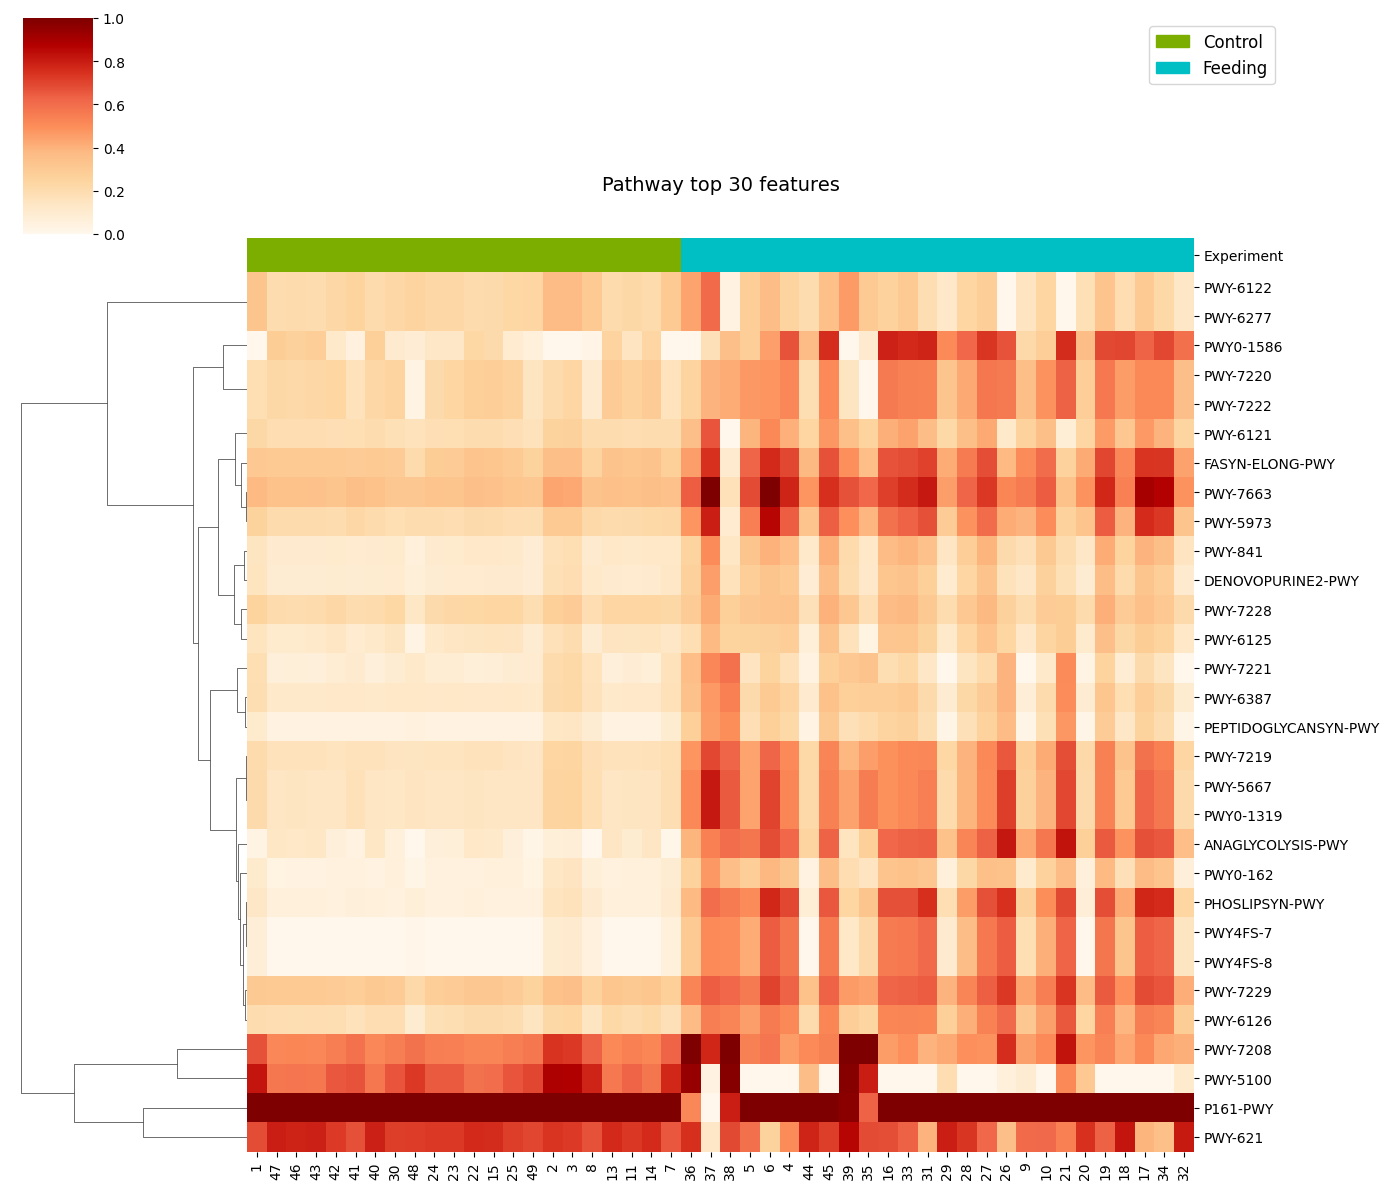

In [195]:
def plot_cluster_heatmap(heatmap,color_dict,row_colors,title):
    # custom_cmap = sns.color_palette("OrRd", as_cmap=True)
    custom_cmap = sns.color_palette("OrRd", as_cmap=True)
    hm = sns.clustermap(heatmap,
                metric="correlation",
                standard_scale=1,
                z_score=None,
                col_colors=row_colors,
                col_cluster=False,
                cmap=custom_cmap,
                # cbar_pos=(0, .2, .03, .4),
                figsize=(14, 12))
    # Create a color legend using the color_dict
    legend_labels = [f"{experiment}" for experiment, color in color_dict.items()]
    legend_colors = [color for _, color in color_dict.items()]
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels, legend_colors)]
    plt.legend(handles=legend_handles, title="Experiment", bbox_to_anchor=(15, 1), loc='upper left')
    # Add a title to the center of the heatmap
    ax  = hm.ax_heatmap
    ax.text(0.5, 1.1, title, fontsize=14, ha="center", va="center", transform=ax.transAxes)
    # Get the current Axes objects
    ax_row_labels = hm.ax_row_dendrogram
    ax_col_labels = hm.ax_col_dendrogram

    # Set row and column labels font size
    row_font_size = 4
    col_font_size = 4

    for label in ax_row_labels.get_yticklabels():
        label.set_fontsize(row_font_size)

    for label in ax_col_labels.get_xticklabels():
        label.set_fontsize(col_font_size)
        #'#7CAE00','#00BFC4'
    red_patch = mpatches.Patch(color='#7CAE00', label='Control')
    blue_patch = mpatches.Patch(color='#00BFC4', label='Feeding')
    legend = plt.legend(handles=[red_patch, blue_patch ], title='',bbox_to_anchor=(18, 1), loc='upper right',fontsize='large')
    # Display the plot
    plt.show()
title = "Pathway top 30 features"
plot_cluster_heatmap(heatmap,color_dict,row_colors,title)


In [196]:
P8_C_F_otus_data = pd.read_csv('KO_C_F.csv',sep=',',index_col=0)
P8_C_F_metadata = pd.read_csv('P8_C_F.csv',sep=',',index_col=0)
P8_C_F_otus_data

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
K00001,150416.67,132436.23,144543.83,7125.77,19670.80,8111.51,143258.74,131006.92,25515.41,18538.51,...,79950.08,113753.66,106525.75,83560.25,56485.25,18178.44,74846.67,79513.83,130081.08,113339.25
K00002,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
K00003,83115.44,74508.20,80797.66,6028.30,15307.57,8567.29,78618.66,71787.50,17204.66,14637.67,...,43915.38,63485.67,58625.69,46039.30,32613.50,11786.73,41229.25,43638.83,71034.66,62341.58
K00004,3284.00,6890.00,6334.66,2168.00,13759.34,1212.91,18.00,26.00,10561.66,16738.34,...,56.00,99.23,63.00,60.00,441.00,213.00,0.00,0.00,9.00,4.00
K00005,5686.02,5121.35,4777.51,17861.71,15883.26,14137.44,5652.87,6391.65,12792.99,17445.66,...,10494.00,7276.48,7989.94,10955.72,12928.98,21751.85,9542.41,10649.97,9728.40,7311.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K19777,28.25,29.75,21.75,17157.50,14892.08,12778.00,320.25,16.75,12317.42,16450.33,...,8503.17,4085.50,6318.50,9020.42,10657.58,20172.83,7571.00,8541.25,1121.00,3462.50
K19778,28.25,33.18,23.18,17165.46,14900.76,12785.86,321.54,18.32,12325.49,16450.33,...,8503.17,4088.64,6318.50,9020.42,10661.15,20185.51,7571.00,8541.25,1122.57,3462.50
K19780,28.25,29.75,21.75,17176.50,14908.41,12792.00,320.25,16.75,12336.09,16465.66,...,8511.84,4085.50,6318.50,9030.09,10667.91,20197.16,7571.00,8541.25,1121.00,3462.50
K19784,5403.85,4984.05,4648.68,17649.18,15679.16,14043.81,5523.87,6279.82,12727.82,17428.33,...,10368.72,7035.38,7947.60,10948.89,12700.15,21389.48,9511.29,10601.61,9122.07,7147.43


In [197]:
def select_top_features_by_abundance(data, top_n=30):
    # Calculate the total abundance of each feature across all samples
    total_abundance = data.sum(axis=1)
    # Sort features by their total abundance in descending order and select the top_n features
    top_features = total_abundance.nlargest(top_n).index
    # Select these top features from the DataFrame
    return data.loc[top_features]

# Select top 30 features based on abundance
P8_C_F_otus_data = select_top_features_by_abundance(P8_C_F_otus_data, 30)
P8_C_F_otus_data

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
K01992,596276.22,531718.08,580101.98,116526.20,171395.56,118879.49,564477.74,510863.34,175735.98,170178.65,...,351881.59,477165.00,449680.81,368338.38,280043.02,170144.86,327396.36,348798.26,509119.81,461600.30
K01990,579195.42,523737.65,565663.45,82626.52,153772.73,92958.40,545156.24,499444.12,156798.50,154809.91,...,320483.56,448336.80,415964.76,335796.73,250052.80,126987.83,299936.37,318373.87,498591.75,438161.02
K15634,551810.64,478808.09,525553.48,37073.88,60760.40,34763.02,531414.20,480716.48,87410.48,52451.15,...,307822.43,428305.05,409823.24,322858.30,217777.15,81887.64,288381.03,306566.66,473893.22,426238.62
K01223,464198.65,408603.50,445418.62,69809.27,101948.71,55450.55,443019.56,404173.18,113207.86,104919.64,...,272095.98,361259.08,348321.00,285378.99,202628.17,111152.38,253893.47,271342.63,407666.93,361046.69
K02529,345652.73,310532.05,334783.52,99413.64,126389.93,98580.22,328319.44,301845.97,122091.51,128610.44,...,214774.23,280357.18,264222.02,225143.67,182595.46,137751.38,200487.03,213856.43,309827.46,272636.38
K02003,384037.87,336989.80,367504.15,64141.04,79597.65,75760.32,369053.09,337172.80,88385.18,72572.59,...,223199.69,308312.95,286452.20,233627.96,177347.65,102215.55,208383.27,221359.07,337689.78,299133.27
K02035,381835.75,332740.88,367540.84,55695.68,72680.25,54480.14,366659.42,326691.73,86274.22,66632.81,...,226154.20,308078.50,296554.38,237240.82,171344.06,90298.18,210946.87,224644.79,321267.70,300008.23
K15580,392303.28,341657.88,375245.98,49438.09,68616.54,40763.08,376012.06,338481.96,83316.13,66059.15,...,229349.87,308893.51,299852.39,240875.98,167837.95,83817.11,214218.86,228469.74,334452.61,306338.04
K07024,295728.81,273386.28,288644.80,92727.20,138014.46,82050.23,274900.64,261284.59,124326.29,150389.27,...,179636.37,227305.38,213747.70,188500.89,153364.91,122825.38,168374.64,180203.59,274411.38,227769.22
K00754,377538.67,326593.83,360990.33,11304.33,28767.84,9252.66,363299.34,324189.17,51498.66,22025.67,...,207848.33,292766.50,282840.00,217970.50,140574.84,38689.51,194344.67,206453.33,313938.33,290508.66


In [198]:
def sort_meta(P8_C_F_metadata,condition = "Experiment"):
    new_meta_index = []
    for index1 in P8_C_F_metadata.index:
        new_meta_index.append(str(index1))
    P8_C_F_metadata.index = new_meta_index
    metadata = P8_C_F_metadata.sort_values(condition)
    return metadata
metadata = sort_meta(P8_C_F_metadata)
metadata.head(10)

,Experiment
1,C
47,C
46,C
43,C
42,C
41,C
40,C
30,C
48,C
24,C


In [199]:
def create_heatmap(otus_data,metadata,condition ="Experiment" ):
    heatmap = otus_data
    otus_data = otus_data.transpose()
    new_column = []
    new_idx = []
    for index1 in otus_data.index:
        new_idx.append(str(index1))
    otus_data.index = new_idx
    # print(otus_data)
    for index1 in otus_data.index:
        for index2 in metadata.index:
            value = metadata.loc[index2, condition]
            if str(index1) == str(index2):
                new_column.append(value)
    otus_data[condition] = new_column
    otus_data = otus_data.sort_values(by=condition)
    # print(otus_data)
    heatmap = otus_data.drop(columns=[condition])
    heatmap = heatmap.transpose()
    return heatmap
heatmap = create_heatmap(P8_C_F_otus_data,P8_C_F_metadata)
heatmap.head(10)

,1,47,46,43,42,41,40,30,48,24,...,26,9,10,21,20,19,18,17,34,32
K01992,596276.22,348798.26,327396.36,368338.38,449680.81,477165.00,351881.59,255018.33,509119.81,525155.61,...,141593.69,175735.98,170178.65,170377.07,265506.16,133311.05,165463.08,92241.92,117138.89,172933.91
K01990,579195.42,318373.87,299936.37,335796.73,415964.76,448336.80,320483.56,235425.83,498591.75,488271.02,...,116612.97,156798.50,154809.91,149637.99,231106.42,99436.18,129954.83,66959.69,76834.76,140699.77
K15634,551810.64,306566.66,288381.03,322858.30,409823.24,428305.05,307822.43,233885.33,473893.22,477029.58,...,63503.03,87410.48,52451.15,100636.04,198329.95,51428.13,102090.90,26133.77,30053.57,122104.54
K01223,464198.65,271342.63,253893.47,285378.99,348321.00,361259.08,272095.98,197990.50,407666.93,407992.10,...,88006.28,113207.86,104919.64,125432.31,187247.38,83955.93,120670.36,49006.41,64751.10,125328.47
K02529,345652.73,213856.43,200487.03,225143.67,264222.02,280357.18,214774.23,148819.83,309827.46,310968.61,...,111965.53,122091.51,128610.44,126579.05,171787.14,109453.26,121431.58,79597.48,105685.01,119895.95
K02003,384037.87,221359.07,208383.27,233627.96,286452.20,308312.95,223199.69,161954.50,337689.78,335831.01,...,97689.64,88385.18,72572.59,121657.63,162993.07,72970.95,94352.12,54878.66,68167.22,104659.14
K02035,381835.75,224644.79,210946.87,237240.82,296554.38,308078.50,226154.20,169380.49,321267.70,342879.29,...,80400.98,86274.22,66632.81,108000.43,162635.02,65217.03,95135.23,41401.57,55243.40,105749.32
K15580,392303.28,228469.74,214218.86,240875.98,299852.39,308893.51,229349.87,171084.83,334452.61,348250.16,...,40061.32,83316.13,66059.15,48216.08,157085.66,60260.12,94122.12,34726.91,45585.92,103005.59
K07024,295728.81,180203.59,168374.64,188500.89,213747.70,227305.38,179636.37,119670.49,274411.38,255742.17,...,149216.51,124326.29,150389.27,208376.45,140952.08,103009.88,111075.76,69438.75,92172.87,100772.48
K00754,377538.67,206453.33,194344.67,217970.50,282840.00,292766.50,207848.33,162022.00,313938.33,326787.00,...,12154.17,51498.66,22025.67,25057.50,130143.68,21440.49,60107.33,6203.17,4001.16,76910.99


In [200]:
# #00BFC4'C
def colordict(metadata,condition ='Experiment' ):
    color_dict=dict(zip(np.unique(metadata[condition]),np.array(['#7CAE00','#00BFC4'])))
    row_colors = metadata[condition].map(color_dict)
    return color_dict,row_colors
color_dict,row_colors = colordict(metadata)

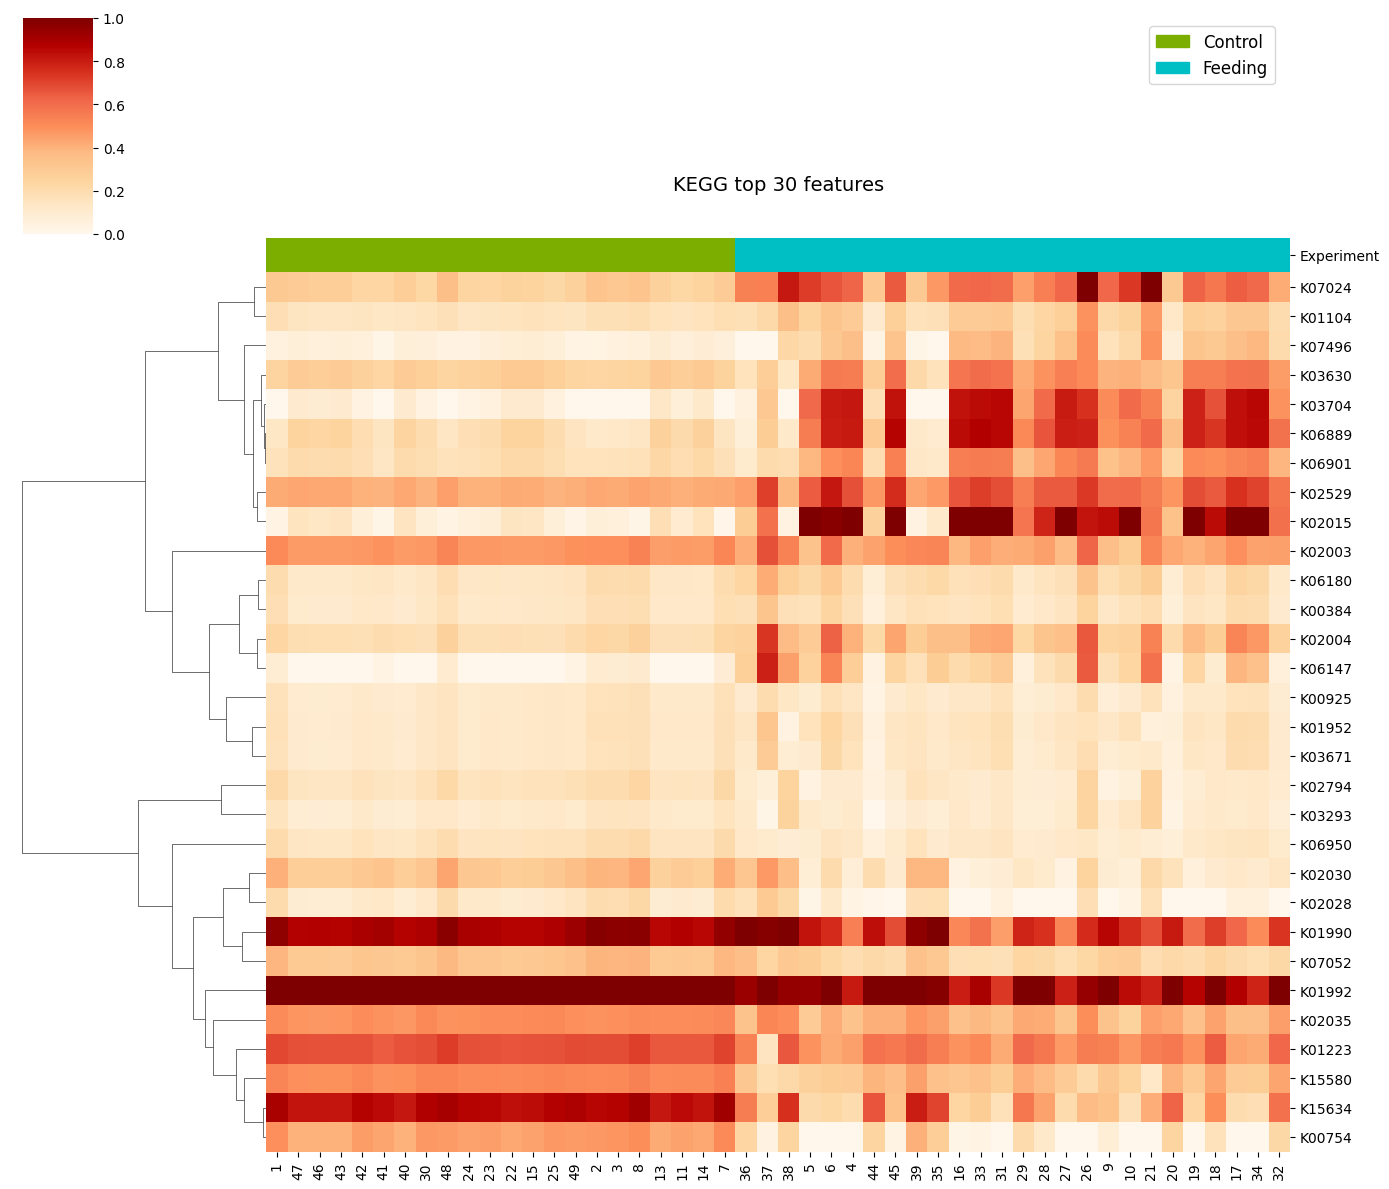

In [201]:
def plot_cluster_heatmap(heatmap,color_dict,row_colors,title):
    # custom_cmap = sns.color_palette("OrRd", as_cmap=True)
    custom_cmap = sns.color_palette("OrRd", as_cmap=True)
    hm = sns.clustermap(heatmap,
                metric="correlation",
                standard_scale=1,
                z_score=None,
                col_colors=row_colors,
                col_cluster=False,
                cmap=custom_cmap,
                # cbar_pos=(0, .2, .03, .4),
                figsize=(14, 12))
    # Create a color legend using the color_dict
    legend_labels = [f"{experiment}" for experiment, color in color_dict.items()]
    legend_colors = [color for _, color in color_dict.items()]
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels, legend_colors)]
    plt.legend(handles=legend_handles, title="Experiment", bbox_to_anchor=(15, 1), loc='upper left')
    # Add a title to the center of the heatmap
    ax  = hm.ax_heatmap
    ax.text(0.5, 1.1, title, fontsize=14, ha="center", va="center", transform=ax.transAxes)
    # Get the current Axes objects
    ax_row_labels = hm.ax_row_dendrogram
    ax_col_labels = hm.ax_col_dendrogram

    # Set row and column labels font size
    row_font_size = 4
    col_font_size = 4

    for label in ax_row_labels.get_yticklabels():
        label.set_fontsize(row_font_size)

    for label in ax_col_labels.get_xticklabels():
        label.set_fontsize(col_font_size)
        #'#7CAE00','#00BFC4'
    red_patch = mpatches.Patch(color='#7CAE00', label='Control')
    blue_patch = mpatches.Patch(color='#00BFC4', label='Feeding')
    legend = plt.legend(handles=[red_patch, blue_patch ], title='',bbox_to_anchor=(18, 1), loc='upper right',fontsize='large')
    # Display the plot
    plt.show()
title = "KEGG top 30 features"
plot_cluster_heatmap(heatmap,color_dict,row_colors,title)